%load_ext autoreload
%reload_ext autoreload
# Tutorial of the EFC routine
This tutorial is though to assist in the first use of the *EFC repo* python class.
The repository collect in a single space the main methods and procedures used in Economic Complexity.
Important literatures can be found at: 
 - Tacchella A. et al., * *, (2012)
 - Hidalgo C. and Hausman R., * *, (2009)
 - Hidalgo C. and Hausman R., * *, (2007)

In [1]:
%load_ext autoreload
%reload_ext autoreload

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import sys, bicm, scipy

In [4]:
sys.path.insert(1, '../')
import efc_repo


# load the raw data

In [12]:
folder = 'data/'
year = 2015
matrix = pd.read_csv('{}Employment matrix {}.csv'.format(folder,year), index_col=0)

# **efc_matrix** class
This class handle a single matrix and it can be used to evaluate different Economic Complexity metrices.

Upload the raw matrix of the employment

In [13]:
efcmat = efc_repo.efc_matrix(matrix)

get the rca matrix and binarize it

In [14]:
rca_value = efcmat.get_rca()
bin_rca = rca_value.get_binary()

otherwise, the same result can be obtained with:

In [15]:
bin_rca_2 = efc_repo.efc_matrix(matrix).get_binarize(method='rca')

the two methods are equal

In [16]:
np.corrcoef(bin_rca.matrix.flatten(), bin_rca_2.matrix.flatten())[0,1]

1.0

The RCA can be generalized. Get the binary biwcm matrix (Bruno et al., *Inferred Comparative Advantage*, JoPC (2023))

In [17]:
bin_biwcm = efc_repo.efc_matrix(matrix).get_binarize(method='biwcm')

Continuous weighted model: BiWCM_c


## compute the Fitness and the Complexity
The Fitness and Complexity algorithm, first described in (Tacchella, 2012), aim to establish the competitiveness (fitness) of countries and the usefulness (complexity) of the traded products by using only a network based approach.


The routing get_fitness() run the algorithm the first time then it is stored. If you call again the function, it does not run the algorithm unless the flag '**force**' is set to '**True**'.


In [18]:
fitness_rca = bin_rca.get_fitness(aspandas=True)
fitness_biwcm = bin_biwcm.get_fitness(aspandas=True)

Sort the fitness by the value of the rca case (by default the sort is by increasing values)

In [19]:
df = pd.concat([fitness_rca, fitness_biwcm], axis=1, sort=True)
df.columns = ['fitness rca', 'fitness biwcm']
df.sort_values('fitness rca')

,fitness rca,fitness biwcm
geo,,
LU,0.462633,0.118324
MT,0.518326,0.162974
CY,0.556883,0.135767
LV,0.689481,0.139588
IE,0.726622,0.231593
PT,0.760889,0.368242
EE,0.793271,0.259124
LT,0.813694,0.154147
NO,0.828587,0.344873


Instead, you can play and see the order using '**fitness biwcm**'.

In [20]:
complexity_rca = bin_biwcm.get_complexity(aspandas=True)
complexity_rca.sort_values('complexity').tail(20)

,complexity
E383,2.302336
C321,2.498289
C231,2.613454
C283,2.985181
C203,3.294657
C204,3.294657
C292,3.294657
E382,3.294657
S952,3.294657
C172,3.908167


Or you can plot the matrix reordered using fitness and complexity

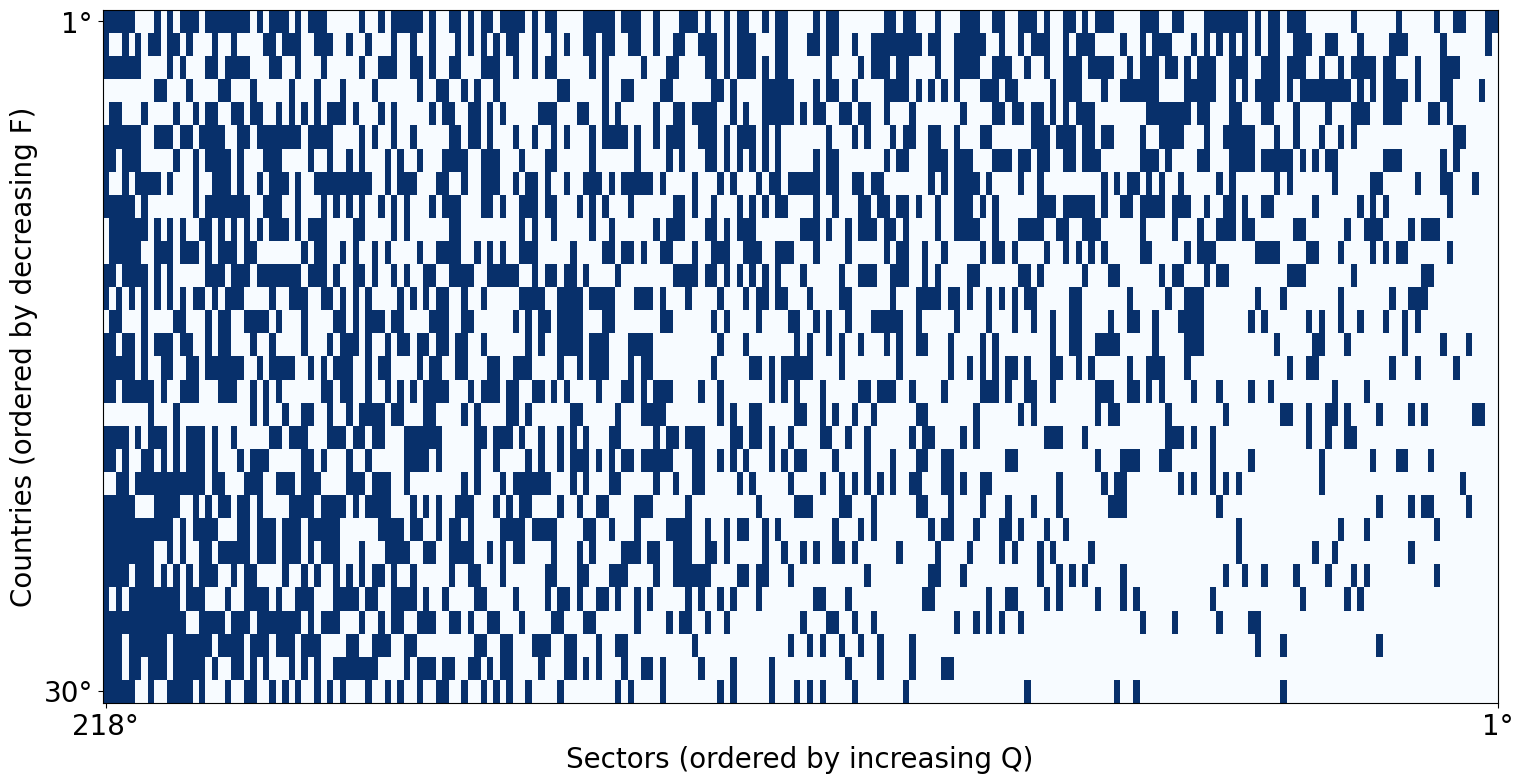

In [21]:
fig, ax = bin_rca.plot_matrix(label_columns='Sectors', label_rows='Countries')

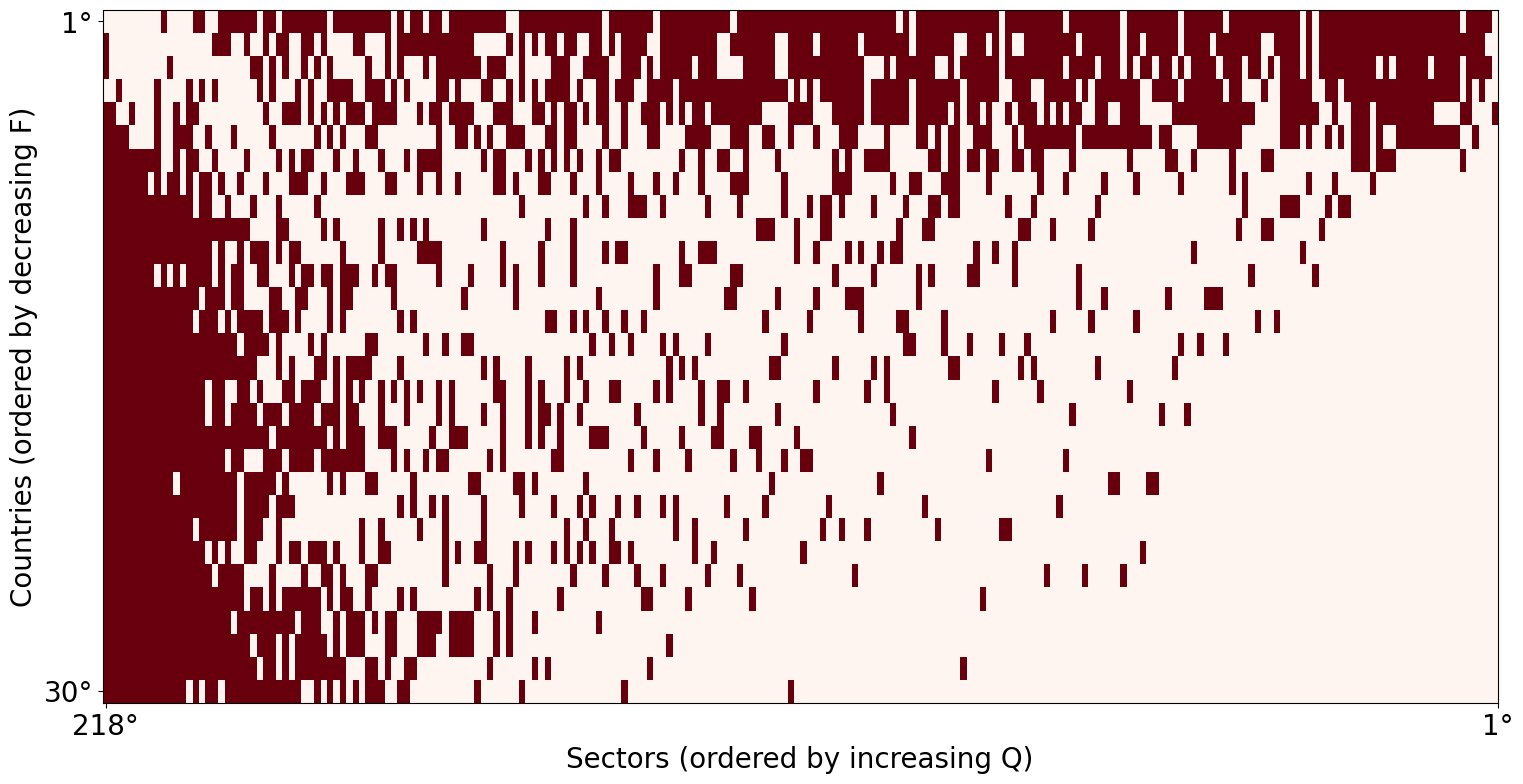

In [22]:
fig, ax = bin_biwcm.plot_matrix(cmap='Reds', label_columns='Sectors', label_rows='Countries')

## compute the diversification and the ubiquity

In [23]:
diversification_rca = bin_rca.get_diversification(aspandas=True)
diversification_biwcm = bin_biwcm.get_diversification(aspandas=True)

In [24]:
df = pd.concat([diversification_rca, diversification_biwcm], axis=1, sort=True)
df.columns = ['diversification rca', 'diversification biwcm']
df.sort_values('diversification rca')

,diversification rca,diversification biwcm
geo,,
LU,47.0,41.0
MT,56.0,46.0
CY,58.0,45.0
UK,60.0,133.0
PT,66.0,46.0
IE,68.0,43.0
LV,69.0,48.0
NO,70.0,50.0
NL,73.0,50.0


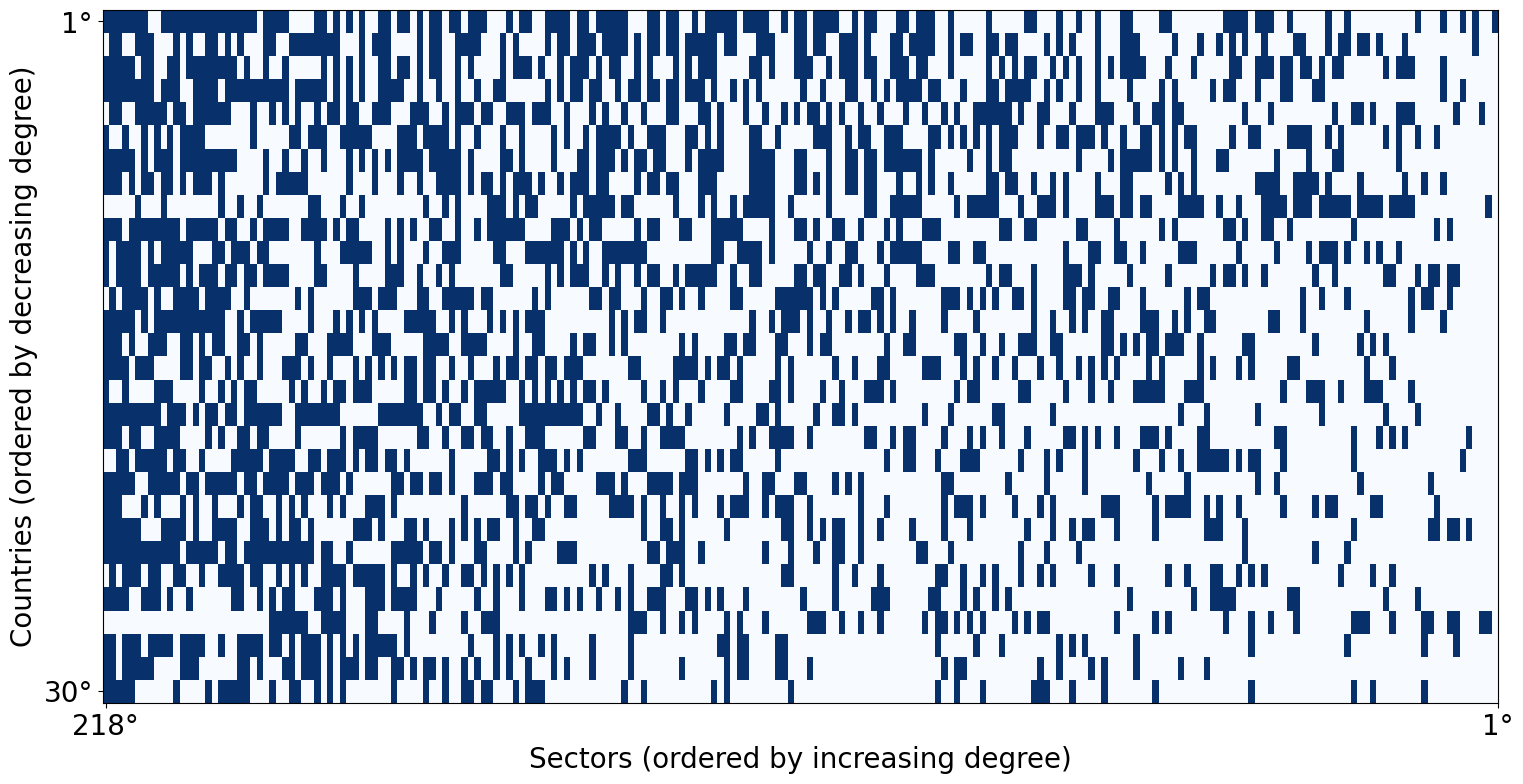

In [25]:
fig, ax = bin_rca.plot_matrix(index='degree', cmap='Blues', label_columns='Sectors', label_rows='Countries')

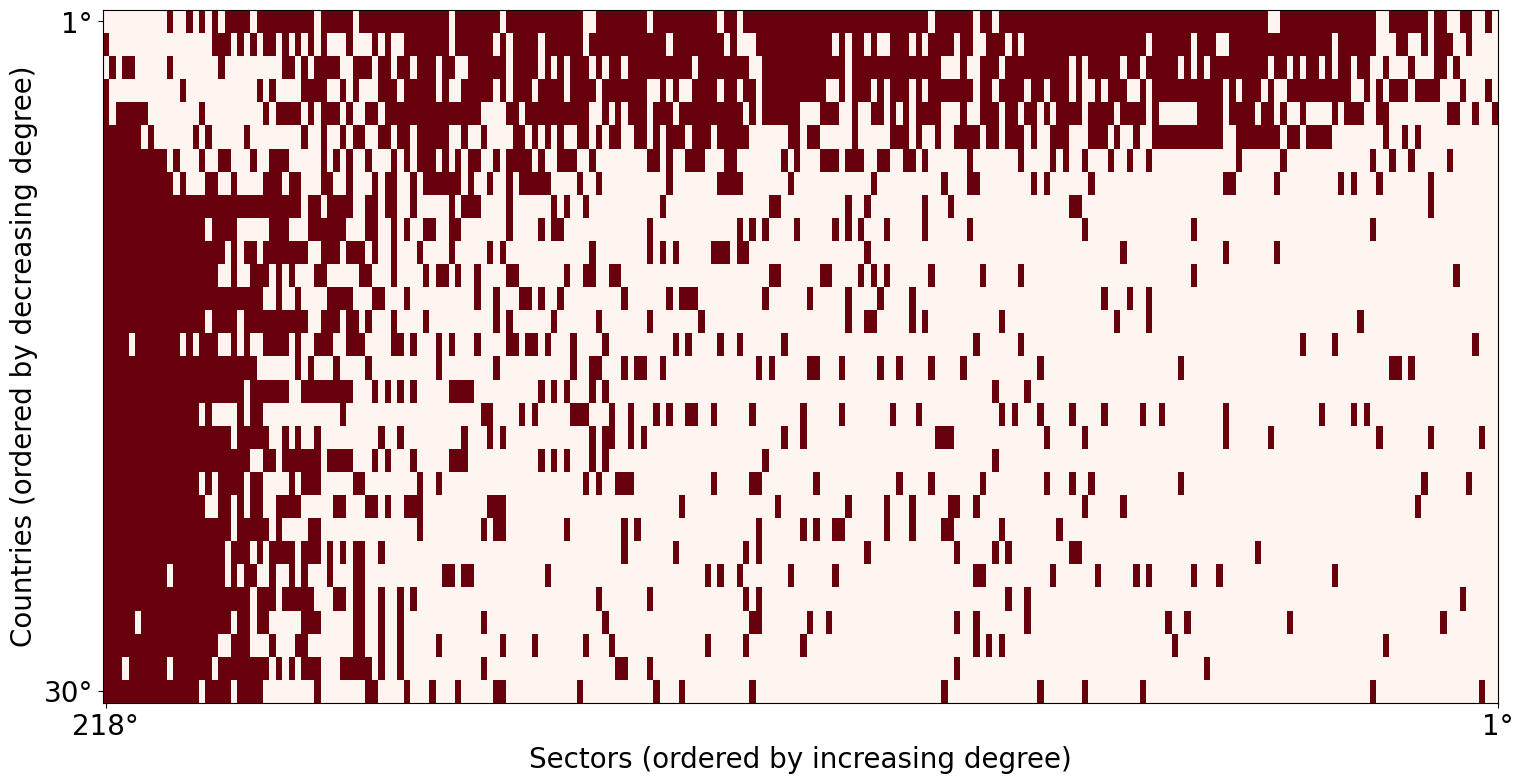

In [26]:
fig, ax = bin_biwcm.plot_matrix(index='degree', cmap='Reds', label_columns='Sectors', label_rows='Countries')

## compute ECI and PCI
The routing get_eci() run the algorithm the first time then it is stored. If you call again the function, it does not run the algorithm unless the flag '**force**' is set to '**True**'.


In [27]:
eci_rca = bin_rca.get_eci(aspandas=True)
eci_biwcm = bin_biwcm.get_eci(aspandas=True)

In [28]:
df = pd.concat([eci_rca, eci_biwcm], axis=1, sort=True)
df.columns = ['eci rca', 'eci biwcm']
df.sort_values('eci rca')

,eci rca,eci biwcm
geo,,
LU,-1.511229,-1.049763
UK,-1.490124,1.921372
NO,-1.276695,-0.508944
NL,-1.252500,0.562743
MT,-1.235023,-0.871525
IE,-1.172562,-0.647805
SE,-1.060120,-0.678142
CY,-0.922275,-1.039988
DK,-0.731947,-0.665155


In [29]:
pci_biwcm = bin_biwcm.get_pci(aspandas=True)
pci_biwcm.sort_values('pci').tail(20)

,pci
L682,1.612684
H522,1.620192
G451,1.639003
F439,1.641976
H493,1.645596
F433,1.679815
G452,1.687978
G466,1.692151
G464,1.703783
G467,1.720327


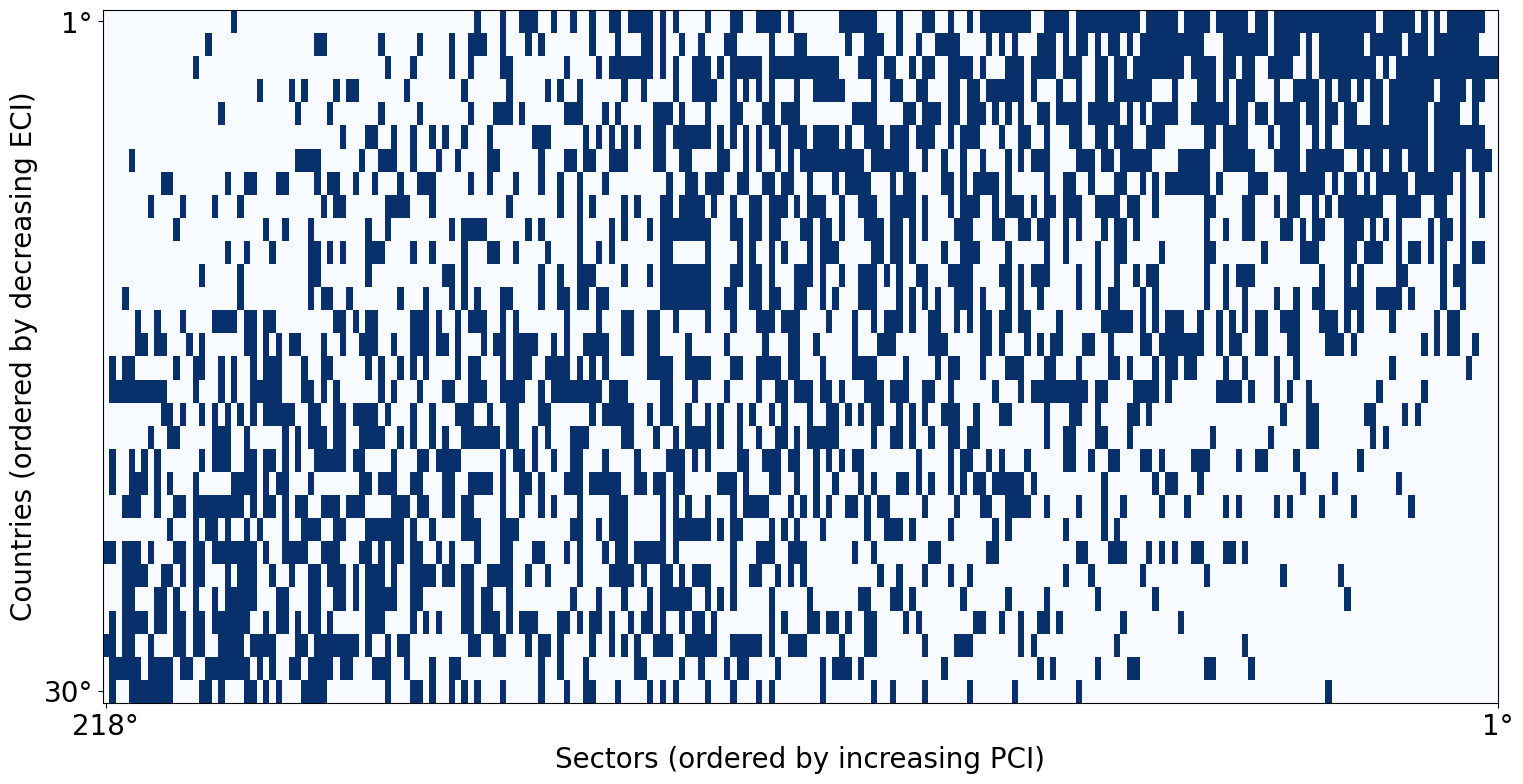

In [30]:
fig, ax = bin_rca.plot_matrix(index='eci', label_columns='Sectors', label_rows='Countries')

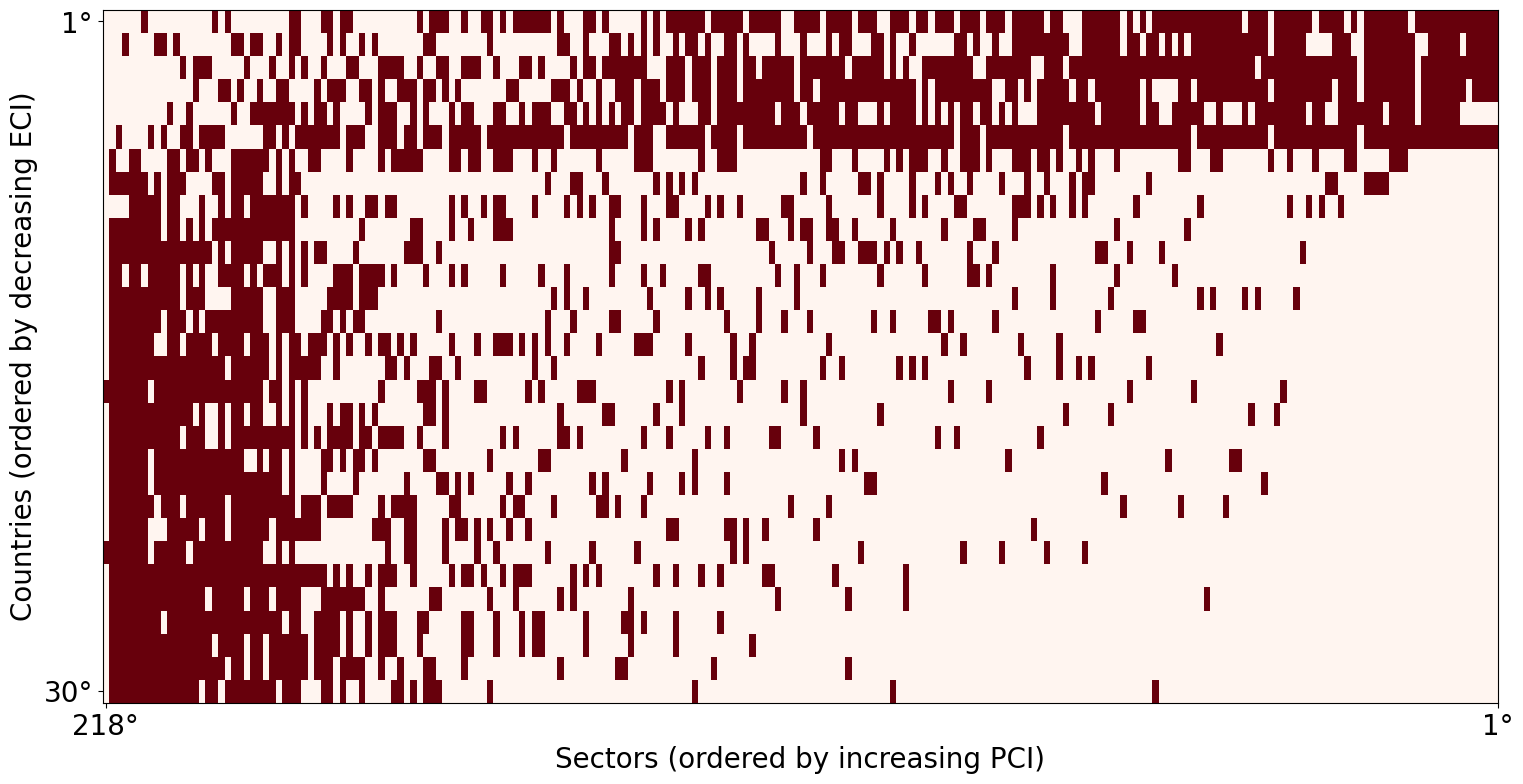

In [31]:
fig, ax = bin_biwcm.plot_matrix(index='eci', cmap='Reds', label_columns='Sectors', label_rows='Countries')

the output of the efc_repo eci routine can be compared with the one available from the ecomplexity package (*https://github.com/cid-harvard/py-ecomplexity/tree/master/ecomplexity*)

In [32]:
import ecomplexity
matrix_elements = matrix.stack().reset_index()
matrix_elements['year'] = year
trade_cols = {'time':'year', 'loc':'geo', 'prod':'level_1', 'val':0}
cdata = ecomplexity.ecomplexity(matrix_elements, trade_cols)
eci_ecomplexity_package = cdata[['geo', 'eci']].drop_duplicates().set_index('geo')

2015


the pearson correlation among the two routines of eci is 1

In [33]:
eci_ecomplexity_package.corrwith(eci_rca)

eci    1.0
dtype: float64

## dummy variable
In order to evaluate panels, the scale of the Fitness among the yuears must be kept fixed. 
This can be done following Mazzilli et al., *E*, JoPC, (2024)

In [34]:
bin_rca_dummy = efc_repo.efc_matrix(matrix).get_binarize(method='rca').add_dummy() # here we show both the ways to upload the matrix
bin_biwcm_dummy = bin_biwcm.add_dummy()

In [35]:
fitness_rca_dummy = bin_rca_dummy.get_fitness(aspandas=True)
fitness_biwcm_dummy = bin_biwcm_dummy.get_fitness(aspandas=True)
# the scale must be fixed, such that the dummy variable has fitness = 1 every year
fitness_rca_dummy /= fitness_rca_dummy.max()
fitness_biwcm_dummy /= fitness_biwcm_dummy.max()

In [36]:
df = pd.concat([fitness_rca_dummy, fitness_biwcm_dummy], axis=1, sort=True)
df.columns = ['fitness rca', 'fitness biwcm']
df.sort_values('fitness biwcm')

,fitness rca,fitness biwcm
geo,,
LU,0.139900,0.026534
CY,0.168423,0.030530
LV,0.207952,0.031408
LT,0.244899,0.034652
MT,0.157227,0.036434
EL,0.259097,0.045834
SE,0.284103,0.047386
FI,0.280705,0.047404
DK,0.297820,0.047901


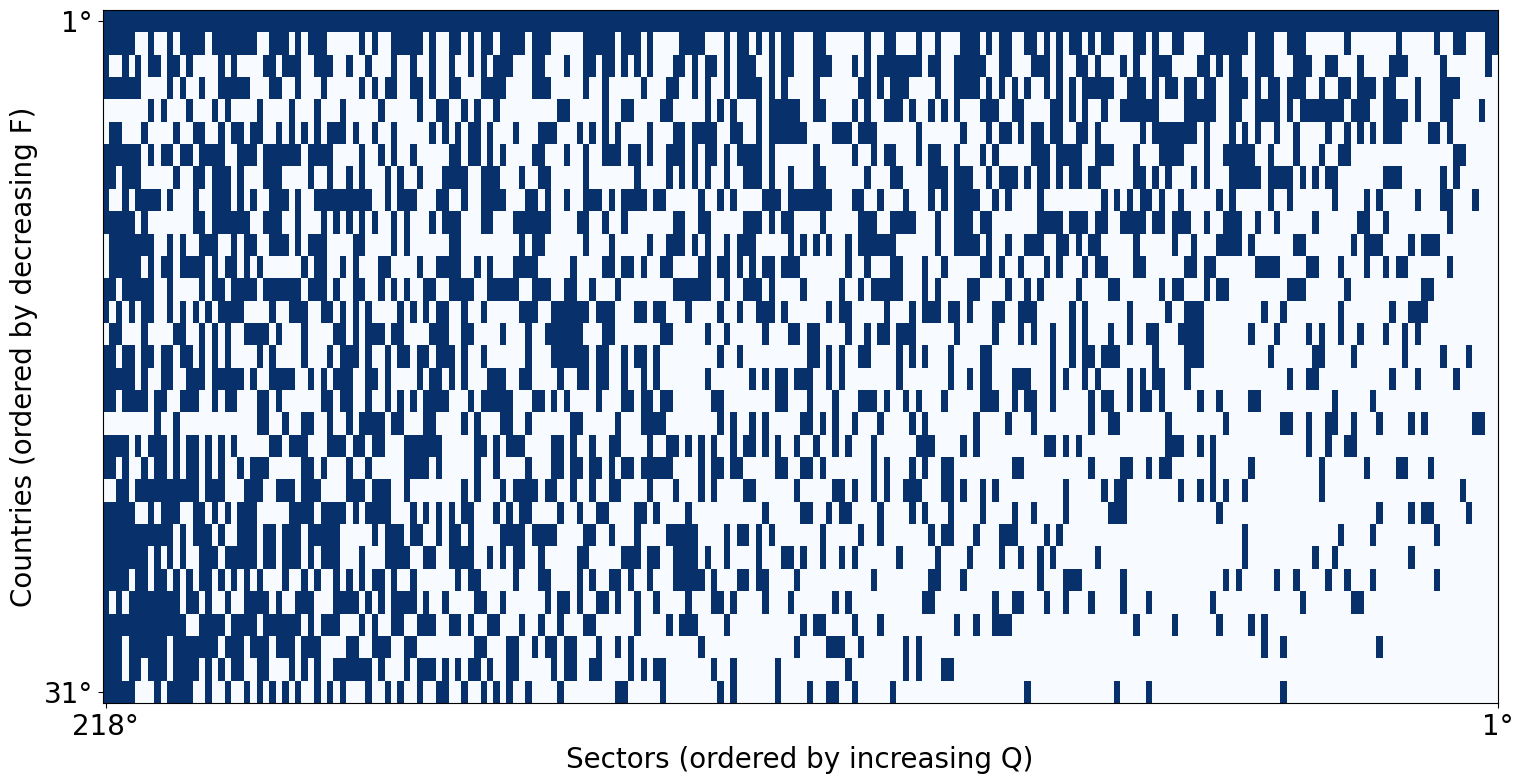

In [37]:
fig, ax = bin_rca_dummy.plot_matrix(label_columns='Sectors', label_rows='Countries')

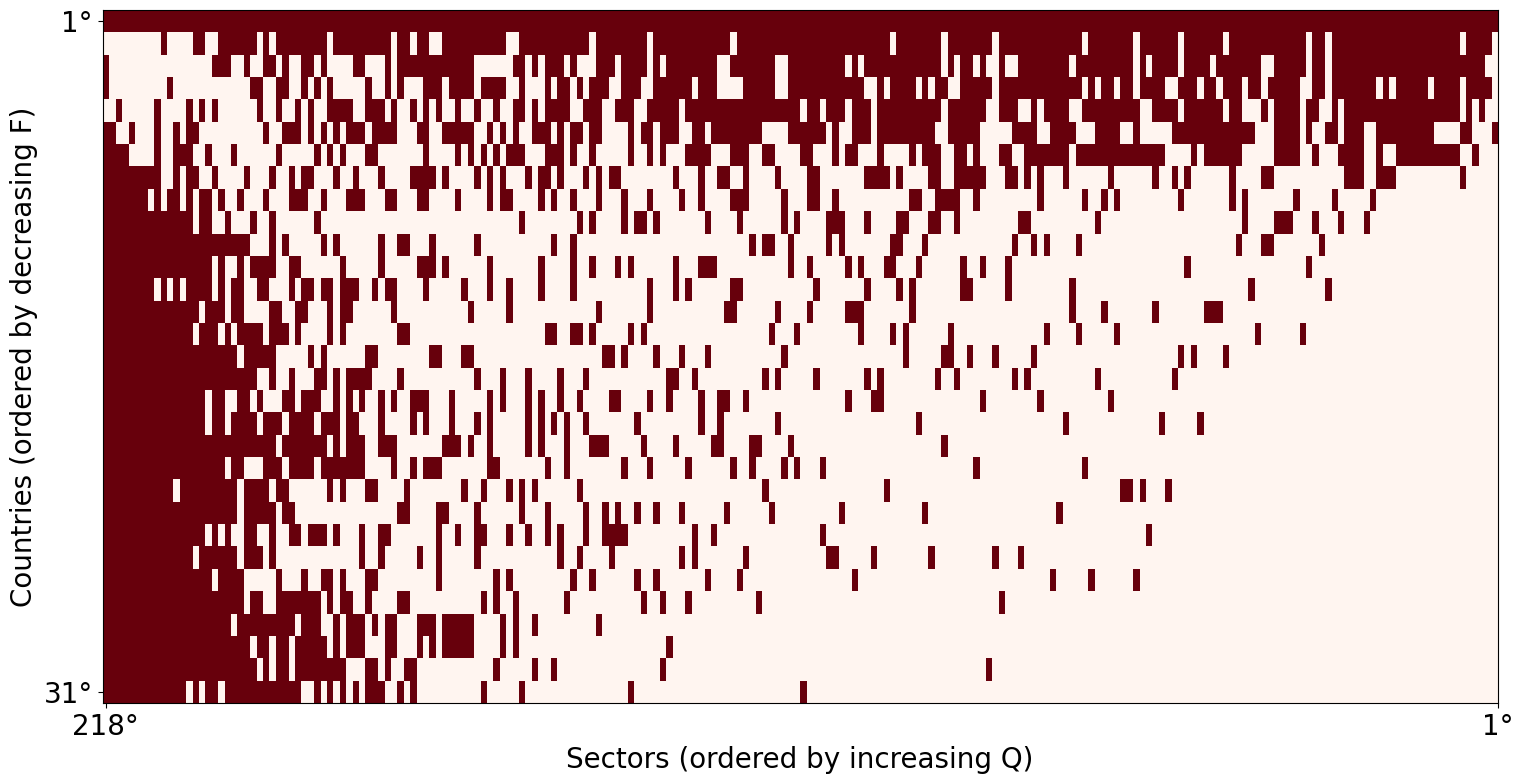

In [38]:
fig, ax = bin_biwcm_dummy.plot_matrix(label_columns='Sectors', label_rows='Countries', cmap='Reds')

## exogenous Fitness
There are situations where the fitness must not be computed, for example when the matrix is based only on partial data or at a very small scale, and the **exogenous fitness** instead is the correct measure. It can be computed, providing the set of complexities, using the routine *get_exogenous_fitness()*

In [39]:
bin_biwcm.get_exogenous_fitness(complexity_rca, aspandas=True).sort_values('exogenous fitness')

,exogenous fitness
geo,
LU,0.026350
CY,0.030235
LV,0.031086
LT,0.034328
MT,0.036294
EL,0.047212
FI,0.047797
SE,0.048674
DK,0.048815


## sector Fitness
The sector fitness compute the fitness on sectors, providing the sector grouping and the complexity.
If the complexity is not provided, the internal one is used (computed).
Here a sector represent only a group of codes of the classification, not specifically production sectors!

The sectors are given through a python dictionary. In the following example we consider a sector as a group of SOC codes having the same first digit.

In [40]:
dict_sectors = {label:label[0] for label in bin_rca.label_columns}

In [41]:
sectors = bin_rca.get_sector_fitness(dict_sectors, complexity=complexity_rca, aspandas=True)

a possible representation of the sector Fitness is though a bar plot as follows

/var/folders/gj/cm3r373905bgc3jn7l8_fh440000gn/T/ipykernel_20533/3132448704.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a=ax.set_yticklabels(ax.get_yticklabels())


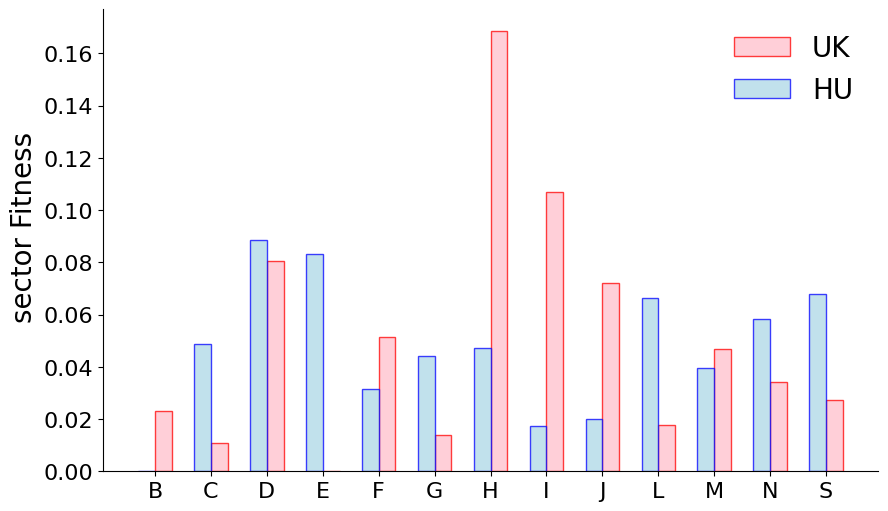

In [42]:
labelsizelabel = 20
labelsizeticks = 16

fig, ax = plt.subplots(figsize=(10,6))
ax.set(xscale='linear',yscale='linear')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

country = 'UK'
bars = sectors.loc[country]
ax.bar(np.arange(len(bars.index))+0.15, height=bars, width=0.3, color='pink', label=country, alpha=0.75, edgecolor='red')
country = 'HU'
bars = sectors.loc[country]
ax.bar(np.arange(len(bars.index))-0.15, height=bars, width=0.3, color='lightblue', label=country, alpha=0.75, edgecolor='blue')

ax.set_ylabel('sector Fitness', size=labelsizelabel, y=0.53, rotation=90)
ax.tick_params(labelsize=labelsizeticks)
a=ax.set_yticklabels(ax.get_yticklabels())
a=ax.set_xticks(np.arange(len(bars.index)))
a=ax.set_xticklabels(bars.index, rotation=0, ha='center', va='top')
ax.legend(frameon=False, fontsize=labelsizelabel, loc=1)

## get the network measures: density, NODF

In [43]:
bin_rca.get_density()

0.368348623853211

In [44]:
bin_rca.get_nodf()

24.084955480098326

## projections
There is also the possibility to evaluate the projections (es. Product Space), validated using BiCM (if the variable alpha is defined) or not

the projection on the rows (meaning on the Countries) using the co-occurrence and with a 10% significance threshold

In [45]:
proj = bin_rca.get_projection(method='cooccurrence', rows=True, alpha=0.1, verbose=False)

/opt/homebrew/lib/python3.10/site-packages/numba/core/utils.py:661: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
/opt/homebrew/lib/python3.10/site-packages/bicm/models_functions.py:326: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  step_fun = args[0]
/opt/homebrew/lib/python3.10/site-packages/bicm/models_functions.py:327: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  arg_step_fun = args[1]
/opt/homebrew/lib/python3.10/site-packages/numba/core/utils.py:661: NumbaExperimentalFeatureWarning: First-class function type feature is experimental
  warnings.warn("First-class function type feature is experimental",
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 1

In [46]:
np.fill_diagonal(proj,0)
spa = scipy.sparse.coo_matrix(proj)
edgelist = [(bin_rca.label_rows[spa.row[i]],bin_rca.label_rows[spa.col[i]]) for i in range(len(spa.data))] 

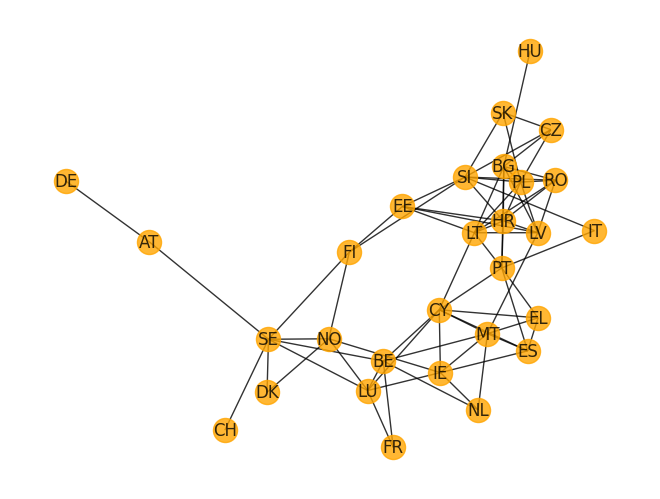

In [47]:
G = nx.from_edgelist(edgelist)
pos = nx.spectral_layout(G)
pos = nx.spring_layout(G,pos=pos, iterations=4)
nx.draw(G, pos=pos, with_labels=True, node_color='orange', alpha=0.8)

We can also consider the projection on the column layer, here describing the Employment Sectors.

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 166/166 [00:00<00:00, 1204.68it/s]


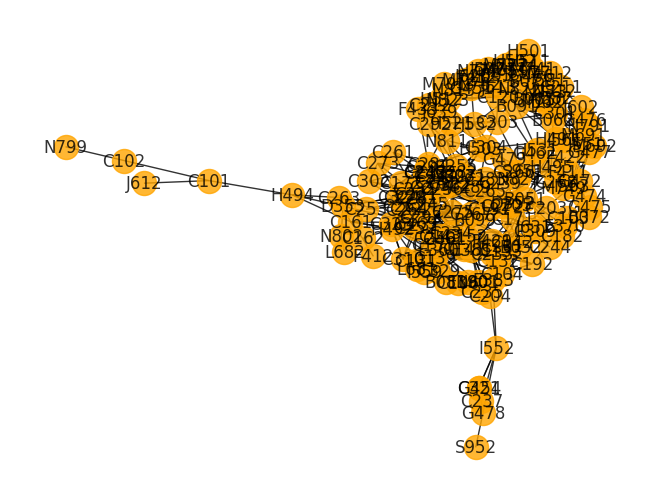

In [49]:
proj = bin_rca.get_projection(method='cooccurrence', rows=False, alpha=0.03, verbose=False)
np.fill_diagonal(proj,0)
spa = scipy.sparse.coo_matrix(proj)
edgelist = [(bin_rca.label_columns[spa.row[i]],bin_rca.label_columns[spa.col[i]]) for i in range(len(spa.data))] 
G = nx.from_edgelist(edgelist)
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
pos = nx.spectral_layout(S[0])
pos = nx.spring_layout(S[0],pos=pos, iterations=4)
nx.draw(S[0], pos=pos, with_labels=True, node_color='orange', alpha=0.8)

One of the most used approach in literature for the projection and relatedness evaluation is the computation of the *Product Space* through the Proximity Network.

Hidalgo C. and Hausmann R., * *, (2007)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 741.25it/s]


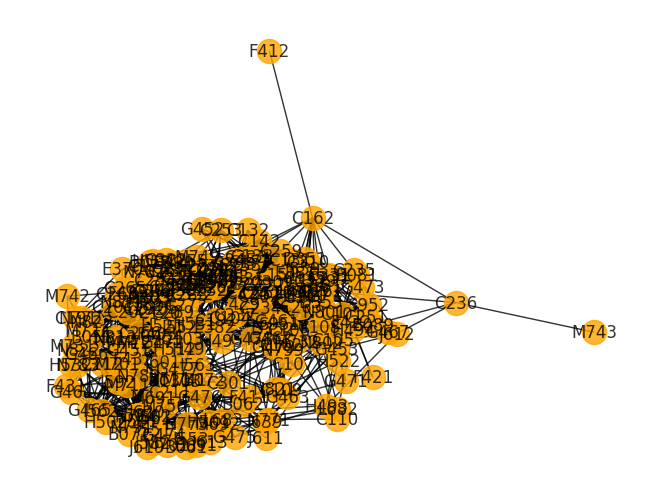

In [50]:
proj = bin_rca.get_projection(method='product space', rows=False, alpha=0.05, verbose=False)
np.fill_diagonal(proj,0)
spa = scipy.sparse.coo_matrix(proj)
edgelist = [(bin_rca.label_columns[spa.row[i]],bin_rca.label_columns[spa.col[i]]) for i in range(len(spa.data))] 
G = nx.from_edgelist(edgelist)
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
pos = nx.spectral_layout(S[0])
pos = nx.spring_layout(S[0],pos=pos, iterations=4)
nx.draw(S[0], pos=pos, with_labels=True, node_color='orange', alpha=0.8)

The taxonomy space build on the co-occurrence approach trying to add the information that diversification, as much as ubiquity, are important actor and if there are large degrees, co-ocurrence may happens by change.
A reference can be found at:

Zaccaria et al., *How the Taxonomy of Products Drives the Economic Development of Countries*, PLoS ONE, 9(12), (2014)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 13115.07it/s]


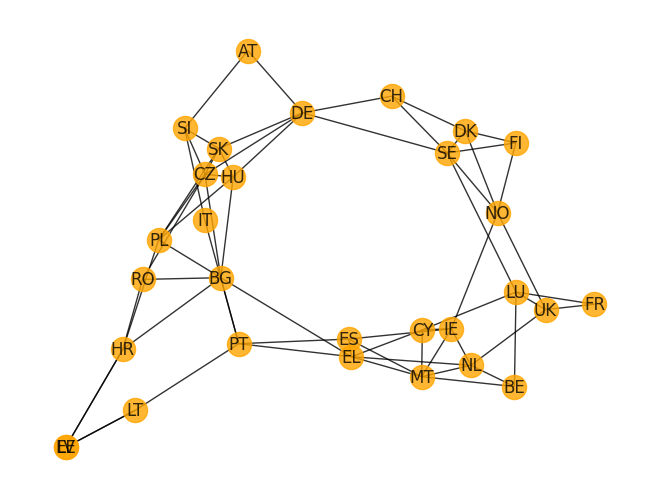

In [51]:
tax = bin_rca.get_projection(method='taxonomy', rows=True, alpha=0.02, verbose=False)
np.fill_diagonal(tax,0)
spa = scipy.sparse.coo_matrix(tax)
edgelist = [(bin_rca.label_rows[spa.row[i]],bin_rca.label_rows[spa.col[i]]) for i in range(len(spa.data))] 
G = nx.from_edgelist(edgelist)
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
pos = nx.spectral_layout(S[0])
pos = nx.spring_layout(S[0],pos=pos, iterations=4)
nx.draw(S[0], pos=pos, with_labels=True, node_color='orange', alpha=0.8)

The *Assist Matrix* approch consider that the co-occurrence are the otput of a information exchange and build the matrix that measure such flow of information.
In detail, the methodology can be found at Pugliese et al., *Unfolding the innovation...*, Scientific Reports, (2018)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 6756.72it/s]


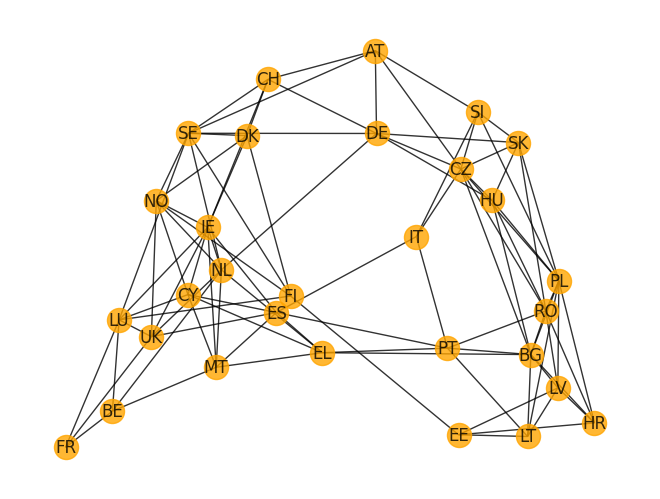

In [52]:
ass = bin_rca.get_projection(method='assist matrix', rows=True, alpha=0.1, verbose=False)
np.fill_diagonal(ass,0)
spa = scipy.sparse.coo_matrix(ass)
edgelist = [(bin_rca.label_rows[spa.row[i]],bin_rca.label_rows[spa.col[i]]) for i in range(len(spa.data))] 
G = nx.from_edgelist(edgelist)
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
pos = nx.spectral_layout(S[0])
pos = nx.spring_layout(S[0],pos=pos, iterations=4)
nx.draw(S[0], pos=pos, with_labels=True, node_color='orange', alpha=0.8)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 5564.51it/s]


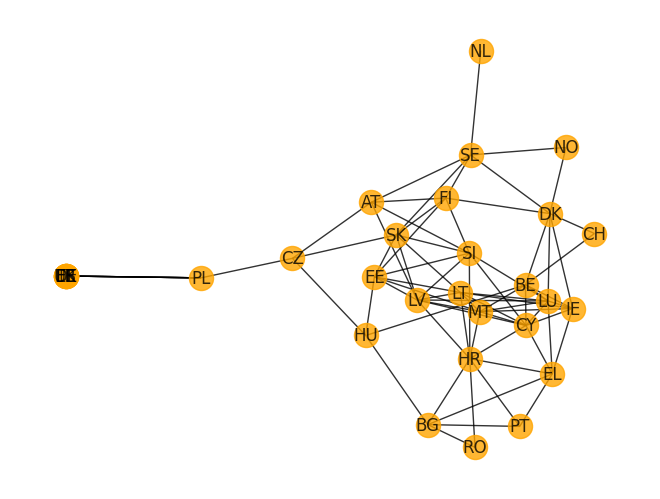

In [53]:
ass = bin_biwcm.get_projection(method='assist matrix', rows=True, alpha=0.05, verbose=False)
np.fill_diagonal(ass,0)
spa = scipy.sparse.coo_matrix(ass)
edgelist = [(bin_rca.label_rows[spa.row[i]],bin_rca.label_rows[spa.col[i]]) for i in range(len(spa.data))] 
G = nx.from_edgelist(edgelist)
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
pos = nx.spectral_layout(S[0])
pos = nx.spring_layout(S[0],pos=pos, iterations=4)
nx.draw(S[0], pos=pos, with_labels=True, node_color='orange', alpha=0.8)

# **efc_matrix_dataset** class
This class consider the stack of many efc_matrix classes, collecting temporal evolutions.

In [59]:
employment_dataset = {}
for year in range(2010,2019):
    employment_dataset[year] = pd.read_csv('{}Employment matrix {}.csv'.format(folder,year), index_col=0)
efc_employment = efc_repo.efc_matrix_dataset(employment_dataset)

remember that *get_binarize()* transform also the original data in efc_employment

In [60]:
dataset_bin_rca = efc_employment.get_binarize(method='rca')

otherwise you can load directly the dataset to a dataset-class, if the data is stored in csv or pkl

In [61]:
dataset_bin_biwcm = efc_repo.efc_matrix_dataset.load_matrices(folder+'Employment matrix {}.csv', range(2010,2019)).get_binarize(method='biwcm')

 11%|███████████████████▉                                                                                                                                                               | 1/9 [00:00<00:03,  2.51it/s]Continuous weighted model: BiWCM_c
Continuous weighted model: BiWCM_c
Continuous weighted model: BiWCM_c
Continuous weighted model: BiWCM_c
Continuous weighted model: BiWCM_c
Continuous weighted model: BiWCM_c
Continuous weighted model: BiWCM_c
Discrete weighted model: BiWCM_d


## some network metrices

<Axes: >

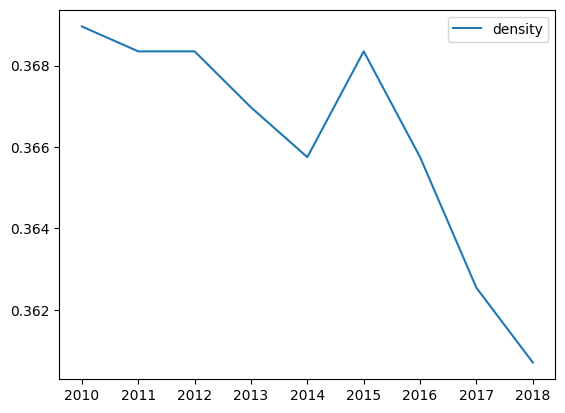

In [62]:
df = dataset_bin_rca.get_density(aspandas=True)
df.plot()

<Axes: >

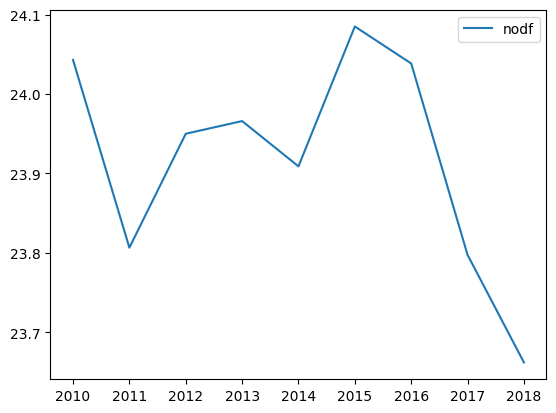

In [63]:
df = dataset_bin_rca.get_nodf(aspandas=True)
df.plot()

## compute the Economic Compleixty metrices

In [64]:
dataset_fitness_rca = dataset_bin_rca.get_fitness(aspandas=True)

In [65]:
dataset_fitness_biwcm = dataset_bin_biwcm.get_fitness(aspandas=True, consider_dummy=True, force=True)

In [66]:
dataset_eci_rca = dataset_bin_rca.get_eci(aspandas=True)

In [67]:
dataset_eci_biwcm = dataset_bin_biwcm.get_eci(aspandas=True)

In [69]:
import matplotlib as mpl

The evolution of the metrics can be visualize just printing the datasets

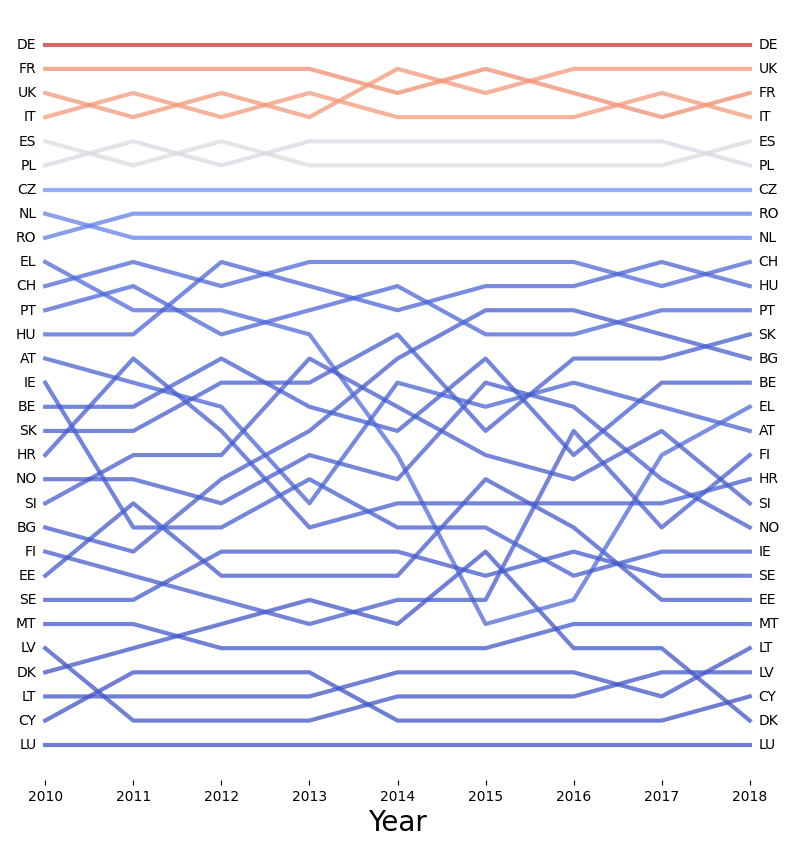

In [81]:
labelsizelabel = 20
labelsizeticks = 16

fig, ax = plt.subplots(figsize=(10,10))
ax.set(xscale='linear',yscale='linear')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y',which='both',left=False,right=False,labelleft=False)

rank = dataset_fitness_biwcm.rank(axis=0, ascending=True)
cmap = mpl.colormaps.get_cmap('coolwarm')
for iso2 in rank.index:
    arr = rank.loc[iso2]
    color = cmap( dataset_fitness_biwcm.loc[iso2,2010] )
    ax.plot(arr, color=color, lw=3.0, alpha=0.75)
    ax.text(arr.index[0]-0.1,arr.iloc[0],s=iso2, ha='right', va='center')
    ax.text(arr.index[-1]+0.1,arr.iloc[-1],s=iso2, ha='left', va='center')

a = ax.set_xlabel('Year', size=labelsizelabel)


The Spearman corelation among the metrics can be computed using the Pandas routine on the datasets

In [77]:
df = pd.concat([dataset_fitness_rca.corrwith(dataset_fitness_biwcm, method='spearman'), dataset_fitness_rca.corrwith(dataset_eci_rca, method='spearman')], axis=1, sort=True)
df.columns = ['fitness rca - fitness biwcm', 'fitness rca - eci rca']
df

,fitness rca - fitness biwcm,fitness rca - eci rca
2010,0.582647,0.666741
2011,0.638265,0.643604
2012,0.628921,0.686318
2013,0.638710,0.707675
2014,0.622692,0.736596
2015,0.665406,0.664071
2016,0.709010,0.690768
2017,0.679644,0.802892
2018,0.668076,0.711680
